## Titanic Survival Predictions
In this dataset, we will train a logistic regression model that can predict the survivors based on a set of features about the passengers. 

In [1]:
import pandas as pd
import seaborn as sns
from sklearn import datasets
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train_titanic =pd.read_csv('train.csv')
test_titanic=pd.read_csv('test.csv')                   

### Data Exploring
Data is split into two files. One for training and one for testing. 

In [3]:
train_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_titanic.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


How many survivors in the traning set?

In [5]:
train_titanic['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

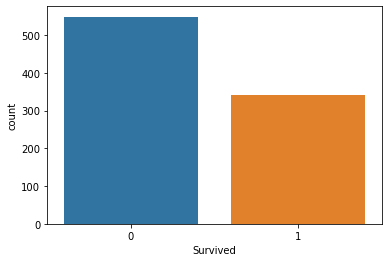

In [6]:
#Visualize Survived with sns countplot
sns.countplot(x='Survived', data=train_titanic) 

In [7]:
print('There are 342 passengers who survived.')

There are 342 passengers who survived.


Can you find Jack and Rose in the data? Use a code. You probably won't find them as they were fictional charachter. See if you can find Beatrice Irene Sandstrom? Read here about her https://www.encyclopedia-titanica.org/titanic-survivor/beatrice-irene-sandstrom.html

In [8]:
# check train and test datasets for name = Jack
print(train_titanic[train_titanic['Name']=='Jack'].Name) if all(train_titanic['Name']=='Jack') else print("Jack is not in the training data")
print(test_titanic[test_titanic['Name']=='Jack'].Name) if all(train_titanic['Name']=='Jack') else print("Jack is not in the testing data")

# you can also use this
print(train_titanic[train_titanic['Name']=='Rose'].Name)
print(test_titanic[test_titanic['Name']=='Rose'].Name)

# check train & test datasets that contains Beatrice
train_titanic[train_titanic['Name']. str.contains('Beatrice')].Name
test_titanic[test_titanic['Name']. str.contains('Beatrice')].Name

Jack is not in the training data
Jack is not in the testing data
Series([], Name: Name, dtype: object)
Series([], Name: Name, dtype: object)


117    Sandstrom, Miss. Beatrice Irene
Name: Name, dtype: object

### Does features make difference?
In the training dataset 
- Pclass - Usually, higher class (class 1) meant a more expensive fare and the other classes paid lesser to be on the ship. What was the survival rate per class?
- Sex — What was the survival rate of women?
- SibSp — What was the survival rate based on number of siblings the passenger had on the ship?
- Parch — What was the survival rate based on number of parents/children the passenger had on the ship?

In [9]:
# survival rate per class
print(train_titanic[['Pclass','Survived']].groupby('Pclass')['Survived'].mean())
# survival rate per Sex
print(train_titanic[['Sex','Survived']].groupby('Sex')['Survived'].mean())
# survival rate per Siblings
print(train_titanic[['SibSp','Survived']].groupby('SibSp')['Survived'].mean())
# survival rate per Parent/Child
print(train_titanic[['Parch','Survived']].groupby('Parch')['Survived'].mean())

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64
SibSp
0    0.345395
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5    0.000000
8    0.000000
Name: Survived, dtype: float64
Parch
0    0.343658
1    0.550847
2    0.500000
3    0.600000
4    0.000000
5    0.200000
6    0.000000
Name: Survived, dtype: float64


In [10]:
#explain results above from the sns.boxplots
print('Pclass- A big number of passengers who died were in the 3rd class. However, we can see that not too many of 1st and 2nd class passengers who died.')
print('Sex- A big number of passengers who died were male.')
print('SibSp- Lots of single people on the ship and they are the ones died the most. Not many of SibSp.')
print('Parch- A big number of passengers who died were single males. It seems like we do not have lots of Parch.')

Pclass- A big number of passengers who died were in the 3rd class. However, we can see that not too many of 1st and 2nd class passengers who died.
Sex- A big number of passengers who died were male.
SibSp- Lots of single people on the ship and they are the ones died the most. Not many of SibSp.
Parch- A big number of passengers who died were single males. It seems like we do not have lots of Parch.


Plot two histogram based on the age. One for the survivors and other for non survivors. According to the histogram was Jack more likely to survive or not survive and why?

Jack was not likely to survive because he was a single male and was on a Pclass 3.


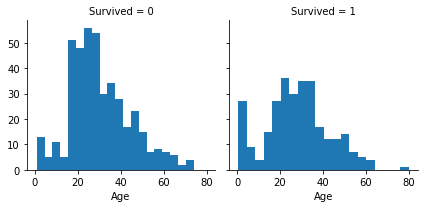

In [11]:
ag=sns.FacetGrid(train_titanic, col='Survived')
ag.map(plt.hist,'Age', bins=20)
print('Jack was not likely to survive because he was a single male and was on a Pclass 3.')

Divide the age histograms on a 3 X 2 subplots. Left column is for non survival data and the right one is for survivors. Each row is for one of the three PClasses

C:\Users\Pookie\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


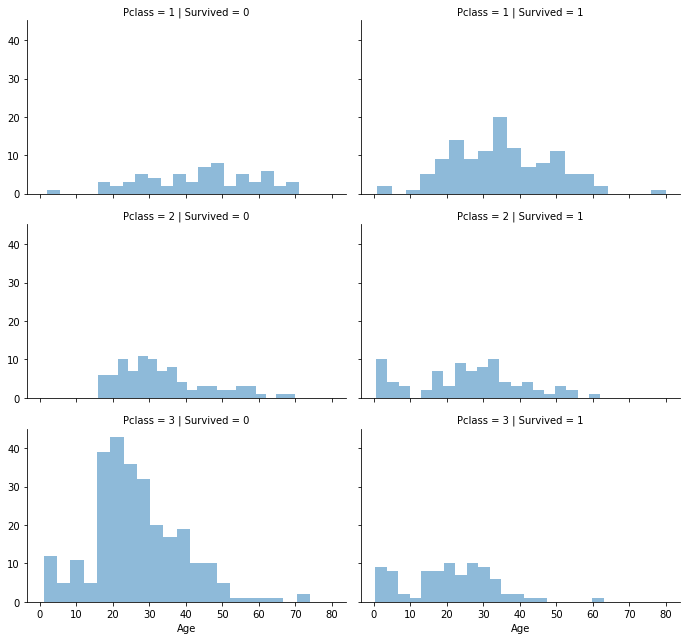

In [12]:
grid = sns.FacetGrid(train_titanic, col='Survived', row='Pclass', size=3, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

## Fix missing Data in the Training Dataset
Which features in the training contains missing values? and how many missing values are there?

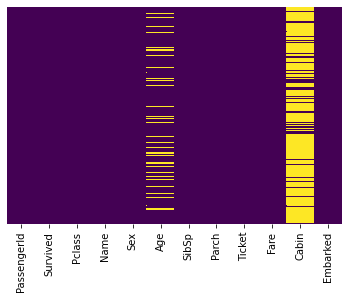

In [13]:
sns.heatmap(train_titanic.isnull(), yticklabels=False,cbar=False, cmap='viridis')

In [14]:
train_titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [15]:
print('There are 866 missing value(Age, Cabin, Embarked)')

There are 866 missing value(Age, Cabin, Embarked)


Find out the age median grouped by PClass and gender. Clean up the data by substituting the nans by the median from the corresponding PClass and gender

In [16]:
median_ages = train_titanic.groupby(['Sex','Pclass'])['Age'].median()
missing_ages = train_titanic[train_titanic['Age'].isnull()]
train_titanic['Age'] = train_titanic ['Age'].fillna(train_titanic.groupby(['Sex','Pclass'])['Age'].median()[0])
train_titanic.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


For the Embarked column, substitute the missing value with the highest occurance value among the entire dataset

In [17]:
train_titanic['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [18]:
max_value = 'S'
df_train = [train_titanic]

for data in df_train:
    data['Embarked'] = data['Embarked'].fillna(max_value)

In [19]:
train_titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

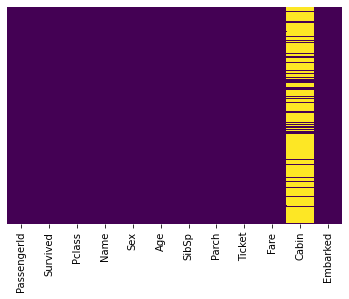

In [20]:
sns.heatmap(train_titanic.isnull(), yticklabels=False,cbar=False, cmap='viridis')

# Let's do our Model
Cabin, Name, ticket and Passenger Id are not important to our ML model. Let's get rid of them

In [21]:
train_titanic.drop(['Cabin', 'Name','Ticket','PassengerId'], axis=1, inplace=True)


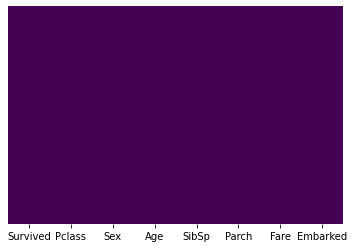

In [22]:
sns.heatmap(train_titanic.isnull(), yticklabels=False,cbar=False, cmap='viridis')

In [23]:
train_titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


Make sure now that your data does not have any nulls

In [24]:
train_titanic.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

We need to convert some of our features to categories and numbers instead of letters as logistic regression model won't be able to decode them. Map the embarked variable into 0,1, and 2 and the sex variable into 0 and 1

% hint: `df_train['Embarked'].astype('category').cat.codes`

In [25]:
# convert categories into numerical values
train_titanic.Embarked = train_titanic.Embarked.astype('category').cat.codes
train_titanic.Sex = train_titanic.Sex.astype('category').cat.codes


In [26]:
train_titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


You are now ready to build a logistic regression model and fit it 

In [27]:
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.30, random_state=42)
from sklearn.preprocessing import StandardScaler

NameError: name 'X' is not defined

In [ ]:
X= train_titanic.drop(['Survived'], axis=1)
y=train_titanic['Survived']
scaler=StandardScaler().fit(X)
x_scaled=scaler.transform(X)
logis_model = LogisticRegression().fit(x_scaled, y)

In [ ]:
logis_model.fit(x_scaled,y)

Show the training score. 

In [ ]:
train_score=logis_model.score(x_scaled,y)
train_score

What are the coefficients. Make a plot that shows the importance of each feature in your model

In [ ]:
logis_model.coef_

In [ ]:
plt.figure(figsize=(7,5))
plt.bar(X.columns,logis_model.coef_[0])

Use the logistic regression model on the test data to predict who will survive. You may need to do same cleaning you have done in the training data to the test data

In [ ]:
sns.heatmap(test_titanic.isnull(), yticklabels=False,cbar=False, cmap='viridis')

In [ ]:
test_titanic.isna().sum()

In [ ]:
print('There are 414 missing values')

In [ ]:
test_titanic.drop(['Cabin','Ticket','PassengerId','Name'], axis=1, inplace=True)

In [ ]:
median_tst = test_titanic.groupby(['Sex','Pclass'])['Age'].median()
missing_tst = test_titanic[test_titanic['Age'].isnull()]
test_titanic['Age']=test_titanic['Age'].fillna(test_titanic.groupby(['Sex','Pclass'])['Age'].median()[0])
test_titanic.head()

In [ ]:
test_titanic.isnull().sum()

In [ ]:
test_titanic.groupby(['Sex','Pclass'])['Fare'].median()
test_titanic[test_titanic['Fare'].isnull()]
test_titanic['Fare']=test_titanic['Fare'].fillna(test_titanic.groupby(['Sex','Pclass'])['Fare'].median()[0])

In [ ]:
test_titanic.isnull().sum()

In [ ]:
test_titanic['Embarked']=test_titanic['Embarked'].astype('category').cat.codes
test_titanic.Sex = test_titanic.Sex.astype('category').cat.codes

In [ ]:
test_titanic.head()

In [ ]:
test_titanic.columns

 How many will survive from the test dataset?

In [ ]:
#Sacle transform testing data
x_scaled_test=scaler.transform(test_titanic)
pred =logis_model.predict(x_scaled_test)

In [ ]:
print('number of survivors in the test dataset is ', sum(pred), 'out of', len(pred))

***end***